# Подготовка

In [1]:
# Импорт библиотек

%matplotlib inline
import re # Регулярные выражения
import pandas as pd # Импортируем библиотеку обработки и анализа данных pandas
import matplotlib.pyplot as plt # Импортируем модуль pyplot библиотеки matplotlib для построения графиков
import datetime # Импортируем модуль datetime для обработки данных в формете даты
import numpy as np # Импортируем библиотеку numpy
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

In [2]:
data = pd.read_csv('Student_Performance.csv', delimiter=',') # Импортируем базу данных

data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


# Анализ данных

In [3]:
data.count() # Считаем количество ненулевых элементов в каждом столбце

Hours Studied                       10000
Previous Scores                     10000
Extracurricular Activities          10000
Sleep Hours                         10000
Sample Question Papers Practiced    10000
Performance Index                   10000
dtype: int64

<Axes: ylabel='Density'>

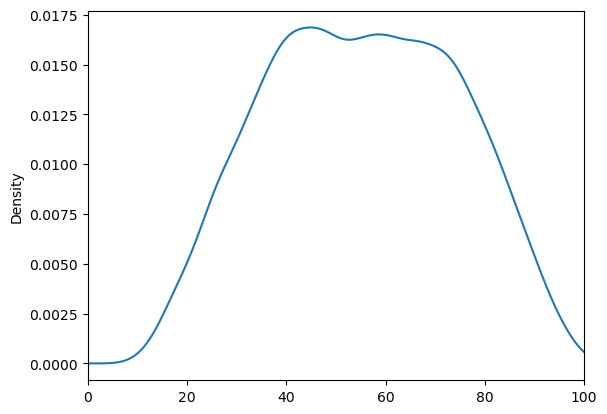

In [4]:
data['Performance Index'].plot(kind='kde', xlim=[0, 100]) # Смотрим на плотность распределения ключевой переменной - индекса производительности

# Парсинг данных

In [5]:
# Кодируем категориальную переменную (внеучебная активность)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["Extracurricular Activities"] = le.fit_transform(data["Extracurricular Activities"])

# Обучение модели

In [6]:
# Разделение на обучающую и тестовые выборки

from sklearn.model_selection import train_test_split

X = data.drop("Performance Index", axis=1)
y = data["Performance Index"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Посчитать корреляцию X_train и X_test

data.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


In [8]:
# Градиентный бустинг

model = RandomForestRegressor(n_estimators = 10, max_depth = 2, random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE (средняя квадратичная ошибка):", mean_squared_error(y_test, y_pred))
print("R^2 (Корреляционный коэффициент):", r2_score(y_test, y_pred))
print("RMSE (Корневая средняя квадратичная ошибка):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE (Средняя абсолютная ошибка):", mean_absolute_error(y_test, y_pred))
print("MAPE (Средняя абсолютная процентная ошибка):", mean_absolute_percentage_error(y_test, y_pred))

MSE (средняя квадратичная ошибка): 74.82399526216558
R^2 (Корреляционный коэффициент): 0.7980922815524907
RMSE (Корневая средняя квадратичная ошибка): 8.650086430907242
MAE (Средняя абсолютная ошибка): 7.156739461554767
MAPE (Средняя абсолютная процентная ошибка): 0.16383884226137843


In [9]:
# Рандомный лес

from sklearn.ensemble import RandomForestRegressor

model3 = RandomForestRegressor(n_estimators=100, random_state=42)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

print("MSE (средняя квадратичная ошибка):", mean_squared_error(y_test, y_pred3))
print("R^2 (Корреляционный коэффициент):", r2_score(y_test, y_pred3))
print("RMSE (Корневая средняя квадратичная ошибка):", np.sqrt(mean_squared_error(y_test, y_pred3)))
print("MAE (Средняя абсолютная ошибка):", mean_absolute_error(y_test, y_pred3))
print("MAPE (Средняя абсолютная процентная ошибка):", mean_absolute_percentage_error(y_test, y_pred3))

MSE (средняя квадратичная ошибка): 5.158838006796808
R^2 (Корреляционный коэффициент): 0.9860792088401176
RMSE (Корневая средняя квадратичная ошибка): 2.271307554426923
MAE (Средняя абсолютная ошибка): 1.8147207361111108
MAPE (Средняя абсолютная процентная ошибка): 0.039643110687394484


In [10]:
# Дерево решений

from sklearn.tree import DecisionTreeRegressor

model4 = DecisionTreeRegressor(random_state=42)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)

print("MSE (средняя квадратичная ошибка):", mean_squared_error(y_test, y_pred4))
print("R^2 (Корреляционный коэффициент):", r2_score(y_test, y_pred4))
print("RMSE (Корневая средняя квадратичная ошибка):", np.sqrt(mean_squared_error(y_test, y_pred4)))
print("MAE (Средняя абсолютная ошибка):", mean_absolute_error(y_test, y_pred4))
print("MAPE (Средняя абсолютная процентная ошибка):", mean_absolute_percentage_error(y_test, y_pred4))

MSE (средняя квадратичная ошибка): 8.812694444444444
R^2 (Корреляционный коэффициент): 0.9762195132401258
RMSE (Корневая средняя квадратичная ошибка): 2.968618271931311
MAE (Средняя абсолютная ошибка): 2.3378333333333337
MAPE (Средняя абсолютная процентная ошибка): 0.05071070169481049


In [11]:
# Градиентный бустинг

model2 = GradientBoostingRegressor(random_state=0)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

print("MSE (средняя квадратичная ошибка):", mean_squared_error(y_test, y_pred2))
print("R^2 (Корреляционный коэффициент):", r2_score(y_test, y_pred2))
print("RMSE (Корневая средняя квадратичная ошибка):", np.sqrt(mean_squared_error(y_test, y_pred2)))
print("MAE (Средняя абсолютная ошибка):", mean_absolute_error(y_test, y_pred2))
print("MAPE (Средняя абсолютная процентная ошибка):", mean_absolute_percentage_error(y_test, y_pred2))

MSE (средняя квадратичная ошибка): 4.3646358483014325
R^2 (Корреляционный коэффициент): 0.9882223120685143
RMSE (Корневая средняя квадратичная ошибка): 2.089171091198955
MAE (Средняя абсолютная ошибка): 1.6578453561683915
MAPE (Средняя абсолютная процентная ошибка): 0.03604216975196981


In [13]:
# К-ближайших соседей

from sklearn.neighbors import KNeighborsRegressor
model6 = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)  # n_neighbors = 5 - число соседей
model6.fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("MSE (средняя квадратичная ошибка):", mean_squared_error(y_test, y_pred6))
print("R^2 (Корреляционный коэффициент):", r2_score(y_test, y_pred6))
print("RMSE (Корневая средняя квадратичная ошибка):", np.sqrt(mean_squared_error(y_test, y_pred6)))
print("MAE (Средняя абсолютная ошибка):", mean_absolute_error(y_test, y_pred6))
print("MAPE (Средняя абсолютная процентная ошибка):", mean_absolute_percentage_error(y_test, y_pred6))

MSE (средняя квадратичная ошибка): 5.94034
R^2 (Корреляционный коэффициент): 0.9839703761874775
RMSE (Корневая средняя квадратичная ошибка): 2.4372812722375725
MAE (Средняя абсолютная ошибка): 1.9511000000000003
MAPE (Средняя абсолютная процентная ошибка): 0.042222871368127586


In [12]:
# Линейная регрессия

from sklearn.linear_model import LinearRegression
model5 = LinearRegression(n_jobs=-1)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)

print("MSE (средняя квадратичная ошибка):", mean_squared_error(y_test, y_pred5))
print("R^2 (Корреляционный коэффициент):", r2_score(y_test, y_pred5))
print("RMSE (Корневая средняя квадратичная ошибка):", np.sqrt(mean_squared_error(y_test, y_pred5)))
print("MAE (Средняя абсолютная ошибка):", mean_absolute_error(y_test, y_pred5))
print("MAPE (Средняя абсолютная процентная ошибка):", mean_absolute_percentage_error(y_test, y_pred5))

MSE (средняя квадратичная ошибка): 4.082628398521857
R^2 (Корреляционный коэффициент): 0.9889832909573145
RMSE (Корневая средняя квадратичная ошибка): 2.0205515085050063
MAE (Средняя абсолютная ошибка): 1.6111213463123049
MAPE (Средняя абсолютная процентная ошибка): 0.03499926582598499


In [14]:
# Градиентный бустинг с использованием CatBoost

import catboost as cb
modelcb = cb.CatBoostRegressor(task_type='GPU',
                              iterations=1000,
                              learning_rate=0.05,
                              depth=16,
                              loss_function='RMSE')

loss_function='RMSE'

modelcb.fit(X_train, y_train)

modelcb.save_model('my_model.cbm')
modelcb.load_model('my_model.cbm')
y_predcb = modelcb.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_predcb))
print("R^2:", r2_score(y_test, y_predcb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_predcb)))
print("MAE:", mean_absolute_error(y_test, y_predcb))
print("MAPE:", mean_absolute_percentage_error(y_test, y_predcb))

0:	learn: 18.3138250	total: 29.8ms	remaining: 29.8s
1:	learn: 17.4480058	total: 86.8ms	remaining: 43.3s
2:	learn: 16.6349876	total: 177ms	remaining: 58.7s
3:	learn: 15.8687645	total: 211ms	remaining: 52.5s
4:	learn: 15.1444508	total: 234ms	remaining: 46.7s
5:	learn: 14.4492333	total: 268ms	remaining: 44.5s
6:	learn: 13.7795903	total: 358ms	remaining: 50.8s
7:	learn: 13.1447453	total: 1.64s	remaining: 3m 23s
8:	learn: 12.5416967	total: 1.7s	remaining: 3m 6s
9:	learn: 11.9707808	total: 1.74s	remaining: 2m 52s
10:	learn: 11.4264588	total: 1.79s	remaining: 2m 41s
11:	learn: 10.9023922	total: 1.88s	remaining: 2m 35s
12:	learn: 10.4003579	total: 2.22s	remaining: 2m 48s
13:	learn: 9.9574485	total: 2.24s	remaining: 2m 37s
14:	learn: 9.5036465	total: 2.41s	remaining: 2m 38s
15:	learn: 9.0755992	total: 2.5s	remaining: 2m 33s
16:	learn: 8.6679772	total: 2.67s	remaining: 2m 34s
17:	learn: 8.2930807	total: 2.7s	remaining: 2m 27s
18:	learn: 7.9339778	total: 2.75s	remaining: 2m 21s
19:	learn: 7.58542

In [18]:
# Создание нейронной сети на основе TensorFlow

import pandas as pd
import tensorflow as tf

# Определение модели
model7 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Компиляция модели
model7.compile(loss='mean_squared_error', optimizer='adam')

# Обучение модели
model7.fit(X_train, y_train, epochs=100)

# Оценка модели
loss = model7.evaluate(X_test, y_test)
print('Loss:', loss)

Epoch 1/100


C:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step - loss: 609.3994
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 34.1190
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 28.2137
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 25.5744
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - loss: 22.9350
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - loss: 20.9841
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 17.1696
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 13.2756
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 10.0663
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - loss: 7.2346
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 5.8794
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - loss: 4.9811
Epoch 13/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 4.8898
Epoch 14/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 4.6380
Epoch 15/100
250/

# Подбор лучших параметров модели

##### Т.к. лучший результат был показан у модели LinearRegression из sklearn, будем подбирать параметры у этой модели

Будем использовать модель Ridge т.к. она является расширением модели LinearRegression и поддерживает сетку параметров

In [29]:
from sklearn.model_selection import GridSearchCV

# Создание сетки параметров для модели
param_grid = {
    'alpha': [1e-3, 1e-2, 1e-1, 1, 10],
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'max_iter': [100, 200, 500, 1000],
    'positive': [True, False],
    'random_state': [None, 0, 10, 42, 44],
    'solver': ['auto', 'lsqr', 'sag', 'cholesky', 'libsvm'],
    'tol': [1e-3, 1e-4, 1e-5]
}

from sklearn.linear_model import Ridge

# Инициализация модели
modelnew = Ridge()
grid_search = GridSearchCV(estimator=modelnew, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Определение лучших параметров
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Создание новой модели с лучшими параметрами
modelideal = Ridge(**best_params)

# Обучение модели на обучающем наборе данных
modelideal.fit(X_train, y_train)

# Прогнозирование значений на тестовом наборе данных
y_predideal = modelideal.predict(X_test)

# Оценка точности модели
print("MSE (средняя квадратичная ошибка):", mean_squared_error(y_test, y_predideal))
print("R^2 (Корреляционный коэффициент):", r2_score(y_test, y_predideal))
print("RMSE (Корневая средняя квадратичная ошибка):", np.sqrt(mean_squared_error(y_test, y_predideal)))
print("MAE (Средняя абсолютная ошибка):", mean_absolute_error(y_test, y_predideal))
print("MAPE (Средняя абсолютная процентная ошибка):", mean_absolute_percentage_error(y_test, y_predideal))

C:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
30000 fits failed out of a total of 60000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Anaconda\Lib\site-packages\sklearn\linear_model\_ridge.py", line 1175, in fit
    return super().fit(X, y, sample_weight=sample_weight)
   

MSE (средняя квадратичная ошибка): 4.081125654330079
R^2 (Корреляционный коэффициент): 0.988987346015456
RMSE (Корневая средняя квадратичная ошибка): 2.0201796094233995
MAE (Средняя абсолютная ошибка): 1.6108131825635497
MAPE (Средняя абсолютная процентная ошибка): 0.03498505903517941


C:\Anaconda\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [-4.23850983 -4.17912062 -4.17903017 ...         nan         nan
         nan]
  warnings.warn(


# Предсказание на новых данных

In [41]:
# Прогнозирование на основе новых данных

new_data = pd.DataFrame({
    'Hours Studied': [8],
    'Previous Scores': [80],
    'Extracurricular Activities': [0],
    'Sleep Hours': [8],
    'Sample Question Papers Practiced': [2]
})

test_predict = modelideal.predict(new_data)

print('Ождиаемый результат:', test_predict)

new_data

Ождиаемый результат: [74.45492443]


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,8,80,0,8,2
